# Broadband Outage Detection

India is seeing an explosion of new competitors in the Broadband space. ABC Broadband' is
a company that is now seeing a lot of customer churn due to customer dissatisfaction because
of broadband outages.

The company has now curated a dataset, where it tracks several variables that it believes
impact the `outage_duration`. They have tracked three different outage durations, `0` for no
outage, `1` for short outages that last anywhere between a few minutes and a maximum of 2
hours, and `2` for long outages that can last from 2 hours to sometimes even a couple of days.
You will now have to use these metrics that the company has tracked to create a machine
learning model that will be able to predict the `outage_duration` so that the company can
better handle outages and improve customer satisfaction and therefore reduce customer
Churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
dataset=pd.read_csv('PROJECT_merged_data.csv')

In [3]:
dataset.head()

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2


In [4]:
dataset['log_report_type'].nunique()

310

In [5]:
dataset['area_code'].nunique()

876

In [6]:
import auto_ml as ml

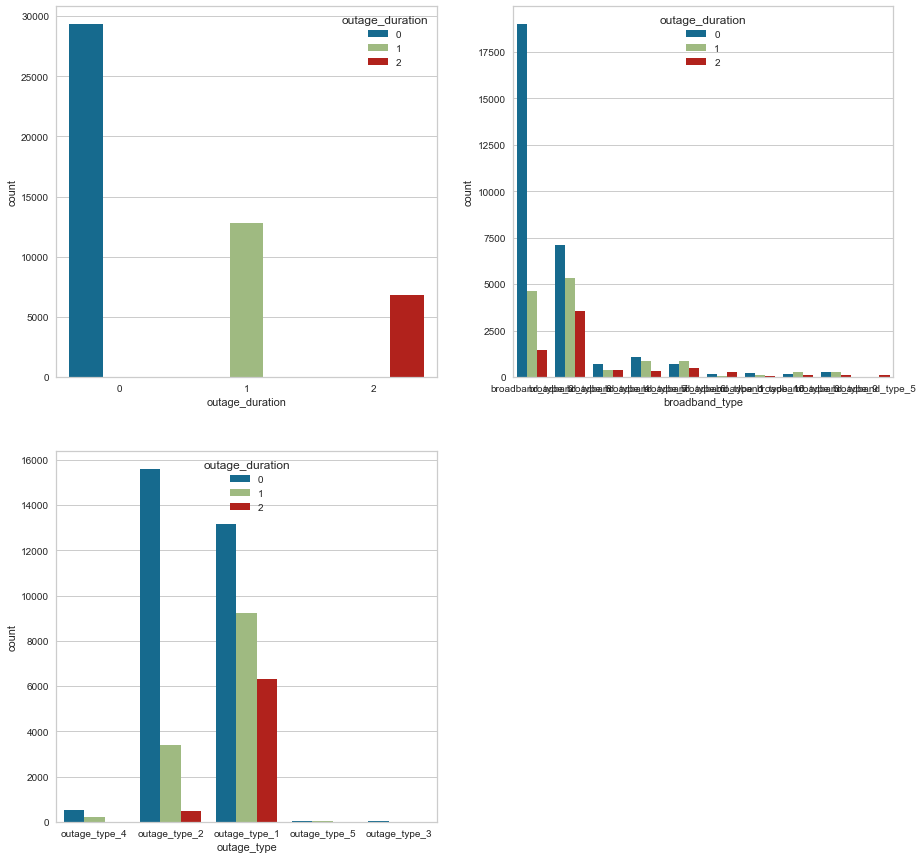

In [7]:
ml.cat_plot(dataset,target='outage_duration')

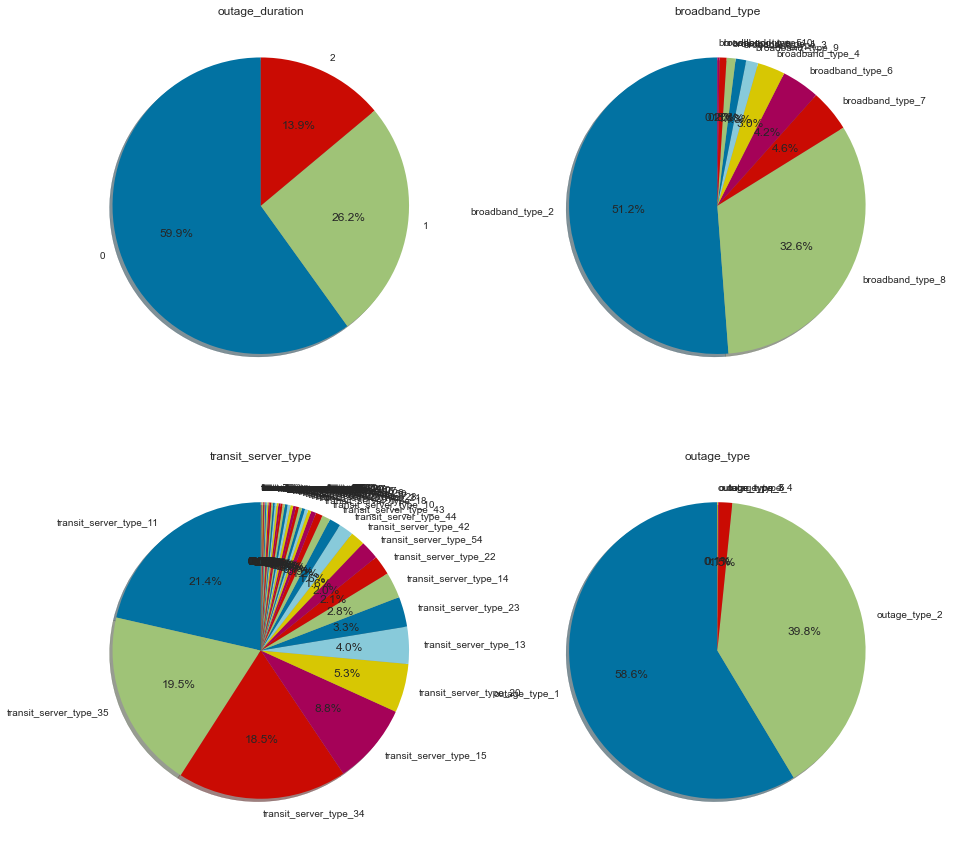

In [8]:
ml.cat_plot(dataset,kind='pie',cat_thresh=100)

In [9]:
ml.find_outliers(dataset)

=====================volume===============
Total :  6710
Percentage :  13.7 %


In [10]:
import pre_process as p_process

In [11]:
processed = p_process.preprocess(dataset, target='outage_duration')

In [12]:
final_data=processed.preprocess_data()

Part-1 Data PreProcessing Started...
Handling Missing Values
Handling Outliers Values
          ===========id==================     
                 Skipping Outliers Handling, No Valid Outliers Found in : id
          ===========volume==================     
                 Skipping Outliers Handling, No Valid Outliers Found in : volume
Encoding Data
Normaliziling Values


In [13]:
final_data

,id,volume,area_code_area_10,area_code_area_100,area_code_area_1000,area_code_area_1002,area_code_area_1006,area_code_area_1007,area_code_area_1008,area_code_area_1009,...,log_report_type_log_report_type_85,log_report_type_log_report_type_86,log_report_type_log_report_type_87,log_report_type_log_report_type_9,log_report_type_log_report_type_94,log_report_type_log_report_type_95,log_report_type_log_report_type_96,log_report_type_log_report_type_98,log_report_type_log_report_type_99,outage_duration
0,0.720524,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.365626,0.001142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.365626,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.365626,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.365626,0.001142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48968,0.793196,0.002283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48969,0.793196,0.001142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48970,0.793196,0.002283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
48971,0.337053,0.005708,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [14]:
from auto_classifier import classifier

In [15]:
clf= classifier(dataset,target='outage_duration',ignore_columns='id',hyperparameter_tunning='best',is_high_cardinality=True,
               cv=5,n_iter=1000)

Part-1 Data PreProcessing Started...
Handling Missing Values
Handling Outliers Values
          ===========volume==================     
                 Skipping Outliers Handling, No Valid Outliers Found in : volume
Encoding Data
Normaliziling Values


In [16]:
clf.pp.data

,volume,area_code,transit_server_type,log_report_type,broadband_type_broadband_type_10,broadband_type_broadband_type_2,broadband_type_broadband_type_3,broadband_type_broadband_type_4,broadband_type_broadband_type_5,broadband_type_broadband_type_6,broadband_type_broadband_type_7,broadband_type_broadband_type_8,broadband_type_broadband_type_9,outage_type_outage_type_2,outage_type_outage_type_3,outage_type_outage_type_4,outage_type_outage_type_5,outage_duration
0,0.000000,33,9547,3645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.001142,108,9547,3645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.000000,108,9547,1337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.000000,108,9547,3379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,0.001142,108,9547,1003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48968,0.002283,12,9547,3645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
48969,0.001142,12,9051,3379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
48970,0.002283,12,9051,3645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
48971,0.005708,54,4318,628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


In [17]:
clf.auto_classify()

Part-2 Building the models...
Logistic Regression:Done
Ridge Classifier:Done
KNN:Done
DT:Done
Navie Bayes:Done
Random Forest:Done
AdaBoost:Done
GBM:Done
XGBM:Done
LGBM:Done
Part-3 Evaluating Model Performance
Part-4 Tunning Hyperparameters
Best Model:: Decision Tree Classifier
Build Success


,Accuracy,AUC_ROC,Precision,Recall,F1 Score,Kappa,Log Loss
Model,,,,,,,
Logistic Regression,0.588157,None,0.446822,0.393937,0.379348,0.138632,None
Ridge Classifier,0.612660,None,0.591549,0.402880,0.390480,0.157147,None
K Neighbors Classifier,0.703931,None,0.655322,0.616249,0.631911,0.448593,None
Decision Tree Classifier,0.821440,None,0.798076,0.777010,0.786872,0.673317,None
Navie Bayes,0.563757,None,0.463369,0.468337,0.436255,0.201084,None
Random Forest Classifier,0.770189,None,0.730374,0.721323,0.725695,0.582802,None
AdaBoost Classifier,0.642573,None,0.565423,0.519843,0.533314,0.302740,None
Gradient Boosting Classifier,0.708423,None,0.670501,0.594096,0.619240,0.428906,None
Extreme Boosting Classifier,0.817356,None,0.788004,0.775529,0.781262,0.666256,None


In [18]:
clf.get_results()

=============================Test Results===========================================


,Accuracy,AUC_ROC,Precision,Recall,F1 Score,Kappa,Log Loss
Model,,,,,,,
Logistic Regression,0.588157,None,0.446822,0.393937,0.379348,0.138632,None
Ridge Classifier,0.612660,None,0.591549,0.402880,0.390480,0.157147,None
K Neighbors Classifier,0.703931,None,0.655322,0.616249,0.631911,0.448593,None
Decision Tree Classifier,0.821440,None,0.798076,0.777010,0.786872,0.673317,None
Navie Bayes,0.563757,None,0.463369,0.468337,0.436255,0.201084,None
Random Forest Classifier,0.770189,None,0.730374,0.721323,0.725695,0.582802,None
AdaBoost Classifier,0.642573,None,0.565423,0.519843,0.533314,0.302740,None
Gradient Boosting Classifier,0.708423,None,0.670501,0.594096,0.619240,0.428906,None
Extreme Boosting Classifier,0.817356,None,0.788004,0.775529,0.781262,0.666256,None



======================Hyperparameter Tunning Results=================================


,Accuracy,AUC_ROC,Precision,Recall,F1 Score,Kappa,Log Loss
Model,,,,,,,
Decision Tree Classifier,0.706177,None,0.671261,0.598747,0.623975,0.431184,None


In [19]:
dataset

,id,area_code,outage_duration,broadband_type,transit_server_type,outage_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,transit_server_type_35,outage_type_4,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_315,2
...,...,...,...,...,...,...,...,...
48968,14714,area_210,0,broadband_type_2,transit_server_type_35,outage_type_2,log_report_type_312,3
48969,14714,area_210,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_232,2
48970,14714,area_210,0,broadband_type_2,transit_server_type_34,outage_type_2,log_report_type_312,3
48971,6253,area_1007,0,broadband_type_8,transit_server_type_15,outage_type_2,log_report_type_201,6


In [20]:
new_data=dataset.iloc[145,:].drop('outage_duration')


In [26]:
list(new_data)

[17822,
 'area_625',
 'broadband_type_8',
 'transit_server_type_20',
 'outage_type_1',
 'log_report_type_171',
 1]

In [22]:
clf.predict(list(new_data))

{'Logistic Regression': array([1.]),
 'Ridge Classifier': array([1.]),
 'K Neighbors Classifier': array([1.]),
 'Decision Tree Classifier': array([1.]),
 'Navie Bayes': array([2.]),
 'Random Forest Classifier': array([1.]),
 'AdaBoost Classifier': array([0.]),
 'Gradient Boosting Classifier': array([0.]),
 'Extreme Boosting Classifier': array([1], dtype=int64),
 'Light Gradient Boosting Classifier': array([1.])}

Dropdown(description='Select Model:', options=(('Logistic Regression', 'lr'), ('Ridge Classifier', 'rc'), ('K …

ToggleButtons(description='Select Evaluationt Technique:', icons=('',), options=(('ROC Curve', 'auc-roc'), ('C…

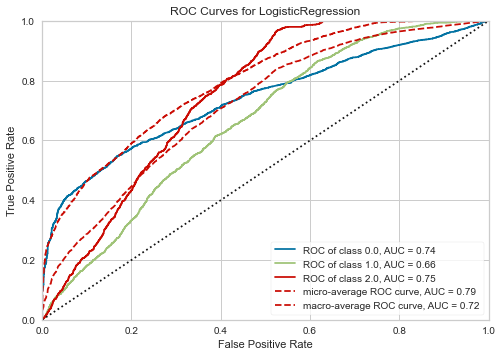

In [23]:
clf.evaluate_model()

In [24]:
clf.save('bod.pkl')

Success!


In [25]:
clf.deploy_model('bvsrohith@gmail.com','12345')

=============================Deploy Started===========================================
Scalarpy Model Id: bvsrohith
Deploy Success !!!
Scoring Endpoint and instructions is mailed to your e-mail id.
